In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

ParserError: Error tokenizing data. C error: Expected 49 fields in line 16989, saw 54


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'sensor_concept_nn')

model.compile(loss='mse', optimizer="adam", metrics=['mean_absolute_error'])


# define the keras model
'''model = Sequential()
model.add(Dense(500, input_dim=48, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(7, activation='linear'))

##Implementing Early stopping
#my_callbacks = [
#    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5),
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]


#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

#compiling module
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])'''

# Display the model
model.summary()

In [15]:
history = model.fit(xtrain_scale, ytrain_scale, epochs=150, verbose=1, validation_data=(xval_scale,yval_scale))


Epoch 1/150
367/367 [==============================] - 2s 5ms/step - loss: 0.1061 - mean_absolute_error: 0.2634 - val_loss: 0.0816 - val_mean_absolute_error: 0.2211
Epoch 2/150
367/367 [==============================] - 2s 5ms/step - loss: 0.0694 - mean_absolute_error: 0.2012 - val_loss: 0.0697 - val_mean_absolute_error: 0.2081
Epoch 3/150
367/367 [==============================] - 2s 4ms/step - loss: 0.0612 - mean_absolute_error: 0.1862 - val_loss: 0.0553 - val_mean_absolute_error: 0.1762
Epoch 4/150
367/367 [==============================] - 2s 4ms/step - loss: 0.0554 - mean_absolute_error: 0.1749 - val_loss: 0.0598 - val_mean_absolute_error: 0.1853
Epoch 5/150
367/367 [==============================] - 2s 5ms/step - loss: 0.0501 - mean_absolute_error: 0.1649 - val_loss: 0.0539 - val_mean_absolute_error: 0.1706
Epoch 6/150
367/367 [==============================] - 2s 4ms/step - loss: 0.0454 - mean_absolute_error: 0.1539 - val_loss: 0.0543 - val_mean_absolute_error: 0.1722
Epoch 7/15

367/367 [==============================] - 2s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0708 - val_loss: 0.0998 - val_mean_absolute_error: 0.2111
Epoch 100/150
367/367 [==============================] - 2s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0643 - val_loss: 0.1014 - val_mean_absolute_error: 0.2148
Epoch 101/150
367/367 [==============================] - 2s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0688 - val_loss: 0.0954 - val_mean_absolute_error: 0.2089
Epoch 102/150
367/367 [==============================] - 2s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0696 - val_loss: 0.1166 - val_mean_absolute_error: 0.2348
Epoch 103/150
367/367 [==============================] - 1s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0684 - val_loss: 0.0936 - val_mean_absolute_error: 0.2055
Epoch 104/150
367/367 [==============================] - 2s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0638 - val_loss: 0.1179 - val_mean_absolute_error: 0.2318
Epoch 105/15

In [14]:
#to evaluate on training data
#scores=model.evaluate(xtrain_scale,y_train_scale,verbose=0)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#model.save("model.h5")
#print("saved the model to disk")
#to load model
#model=load_model('model.h5')

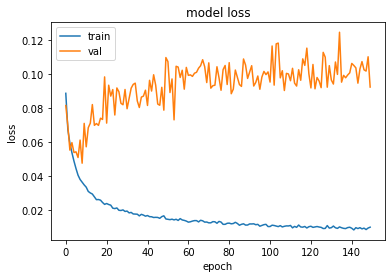

In [18]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
y_train[:,4], y_val[:,4]

(array([1200.,   75.,  450., ...,  450.,  825., 1200.]),
 array([ 825.,  450., -300., ...,  825.,   75., -300.]))

In [27]:
np.max(X_train[:,4])

4.797192578577112

In [28]:
np.max(X_val[:,4])

4.8911509119104455

In [29]:
np.min(X_train[:,4])

-1.2907000112684268

In [30]:
np.min(X_val[:,4])

-1.3846583446017602